In [1]:
# Suppresss warning messages

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [3]:
# Load in the DataFrame
df = pd.read_csv("profiles.csv")

In [4]:
# Explore data
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [5]:
# Know available columns
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [6]:
# Explore job column
df.job.head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

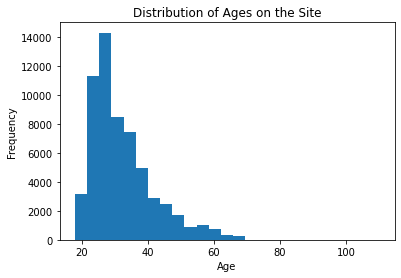

In [7]:
# Visualize some of the Data

# Get the distribution of ages
plt.hist(df.age, bins=25)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Ages on the Site")
plt.show()

In [8]:
# Formulate a Question

# Find what possible values are available for Zodiac signs
df.sign.value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

In [9]:
# Explore whate features are key in 
# predicting a user's Zodiac sign

# Find a user's Zodiac sign from
# (drinking, drugs, smoking and essays)

# Augment Data to retrieve required features

zodiac_df = df[["drinks", "drugs", "smokes", "essay0", "essay1", "essay2",
                "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", 
                "essay9", "sign"]]
zodiac_df.head()

,drinks,drugs,smokes,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sign
0,socially,never,sometimes,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,gemini
1,often,sometimes,no,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,cancer
2,socially,NaN,no,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",pisces but it doesn&rsquo;t matter
3,socially,NaN,no,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,pisces
4,socially,never,no,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,aquarius


In [10]:
# Transform data
print(zodiac_df["drinks"].unique())
# Transform drinks column
zodiac_df["drinks"] = zodiac_df["drinks"].replace(np.nan, 'other', regex=True)
print("Updated:", zodiac_df["drinks"].unique())
drink_mapping = {"other": 0, "not at all": 1, "rarely": 2, "socially": 3, 
                 "often": 4, "very often": 5, "desperately": 6}
zodiac_df["drinks_code"] = zodiac_df["drinks"].map(drink_mapping)

['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
Updated: ['socially' 'often' 'not at all' 'rarely' 'other' 'very often'
 'desperately']


In [11]:
# Transform smokes column
print(zodiac_df["smokes"].unique())
# Removing the NaNs
zodiac_df["smokes"] = zodiac_df["smokes"].replace(np.nan, 'other', regex=True)
print("Updated:", zodiac_df["smokes"].unique())
smokes_mapping = {"other": 0, "sometimes": 1, "no": 2, "when drinking": 3,
                  "yes": 4, "trying to quit": 5}

zodiac_df["smokes_code"] = zodiac_df.smokes.map(smokes_mapping)

['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']
Updated: ['sometimes' 'no' 'other' 'when drinking' 'yes' 'trying to quit']


In [12]:
# Transform drugs column
print(zodiac_df["drugs"].unique())
# Removing the NaNs
zodiac_df["drugs"] = zodiac_df["drugs"].replace(np.nan, 'other', regex=True)
print("Updated:", zodiac_df["drugs"].unique())
drugs_mapping = {"other": 0, "never": 1, "sometimes": 2, "often": 3}

zodiac_df["drugs_code"] = zodiac_df.drugs.map(drugs_mapping)

['never' 'sometimes' nan 'often']
Updated: ['never' 'sometimes' 'other' 'often']


In [13]:
# Transform essay columns
essay_cols = ["essay0","essay1","essay2","essay3","essay4",
              "essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = zodiac_df[essay_cols].replace(np.nan, '', regex=True)
print(all_essays.isnull().values.any())
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
# print(all_essays.head())
# print(all_essays.iloc[0])
# Adding sentence length  
zodiac_df["essay_len"] = all_essays.apply(lambda x: len(x))
# Adding average word length 
zodiac_df["avg_word_length"] = all_essays.apply(lambda x: np.mean([len(w) for w in x.split()]))
print(zodiac_df["avg_word_length"].head())

False
0    4.453608
1    4.215827
2    5.212838
3    5.012658
4    5.269565
Name: avg_word_length, dtype: float64


In [14]:
print(zodiac_df["avg_word_length"].isnull().values.any())
# replace nan with mean
zodiac_df["avg_word_length"] = zodiac_df["avg_word_length"].fillna(zodiac_df["avg_word_length"].mean())
print(zodiac_df["avg_word_length"].isnull().values.any())

True
False


In [15]:
zodiac_df.head()

,drinks,drugs,smokes,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sign,drinks_code,smokes_code,drugs_code,essay_len,avg_word_length
0,socially,never,sometimes,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,gemini,3,1,1,2644,4.453608
1,often,sometimes,no,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,cancer,4,2,2,1453,4.215827
2,socially,other,no,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",pisces but it doesn&rsquo;t matter,3,2,0,5517,5.212838
3,socially,other,no,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,pisces,3,2,0,477,5.012658
4,socially,never,no,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,aquarius,3,2,1,725,5.269565


In [16]:
# Prepare data 
zodiac_features = zodiac_df[['smokes_code', 'drinks_code', 'drugs_code',
                             'essay_len', 'avg_word_length']]
print(zodiac_features.head())

# Normalize data
X = zodiac_features.values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

zodiac_features = pd.DataFrame(X_scaled, columns=zodiac_features.columns)
zodiac_features.dropna(inplace=True)
zodiac_features.head()

   smokes_code  drinks_code  drugs_code  essay_len  avg_word_length
0            1            3           1       2644         4.453608
1            2            4           2       1453         4.215827
2            2            3           0       5517         5.212838
3            2            3           0        477         5.012658
4            2            3           1        725         5.269565


,smokes_code,drinks_code,drugs_code,essay_len,avg_word_length
0,0.2,0.500000,0.333333,0.027372,0.002754
1,0.4,0.666667,0.666667,0.015000,0.002564
2,0.4,0.500000,0.000000,0.057215,0.003360
3,0.4,0.500000,0.000000,0.004861,0.003200
4,0.4,0.500000,0.333333,0.007438,0.003405


In [17]:
# Check for Nan in features
print(zodiac_features.isnull().values.any())

False


In [18]:
# Check for nan in target
print(zodiac_df.sign.isnull().values.any())
zodiac_df["sign"] = zodiac_df["sign"].replace(np.nan, 'unknown', regex=True)
print('Updated', zodiac_df.sign.isnull().values.any())

True
Updated False


In [19]:
target_values = zodiac_df.sign.unique()
print(target_values)
len(target_values)

['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' 'unknown'
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it doesn&rsquo;t matter'


49

In [20]:
zodiac_sign_map = {sign: val for sign, val in zip(target_values, range(len(target_values)))}
print(zodiac_sign_map)

{'gemini': 0, 'cancer': 1, 'pisces but it doesn&rsquo;t matter': 2, 'pisces': 3, 'aquarius': 4, 'taurus': 5, 'virgo': 6, 'sagittarius': 7, 'gemini but it doesn&rsquo;t matter': 8, 'cancer but it doesn&rsquo;t matter': 9, 'leo but it doesn&rsquo;t matter': 10, 'unknown': 11, 'aquarius but it doesn&rsquo;t matter': 12, 'aries and it&rsquo;s fun to think about': 13, 'libra but it doesn&rsquo;t matter': 14, 'pisces and it&rsquo;s fun to think about': 15, 'libra': 16, 'taurus but it doesn&rsquo;t matter': 17, 'sagittarius but it doesn&rsquo;t matter': 18, 'scorpio and it matters a lot': 19, 'gemini and it&rsquo;s fun to think about': 20, 'leo and it&rsquo;s fun to think about': 21, 'cancer and it&rsquo;s fun to think about': 22, 'libra and it&rsquo;s fun to think about': 23, 'aquarius and it&rsquo;s fun to think about': 24, 'virgo but it doesn&rsquo;t matter': 25, 'scorpio and it&rsquo;s fun to think about': 26, 'capricorn but it doesn&rsquo;t matter': 27, 'scorpio': 28, 'capricorn and it&r

In [21]:
zodiac_df["sign_target"] = zodiac_df["sign"].map(zodiac_sign_map)
zodiac_df.tail()

,drinks,drugs,smokes,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sign,drinks_code,smokes_code,drugs_code,essay_len,avg_word_length,sign_target
59941,socially,never,no,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...,cancer and it&rsquo;s fun to think about,3,2,1,1652,4.437500,22
59942,often,sometimes,no,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",<strong>movies</strong>:<br />\nhook (the grea...,iphone<br />\ncontact lenses<br />\nheadphones...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo somewher...,meh if you made it this far you might as well.,leo but it doesn&rsquo;t matter,4,2,2,2997,5.574561,10
59943,not at all,never,no,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,"last book: ""game change"".<br />\nmovies: bourn...",- iphone<br />\n- friends and family<br />\n- ...,"aside from work, how to improve my home.",out enjoying friendly conversation over dinner.,please let me think about this more.,we have similar interests.,sagittarius but it doesn&rsquo;t matter,1,2,1,1853,4.830189,18
59944,socially,often,trying to quit,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,it used to be the hair until i mowed it off bu...,where to begin musically: right now i listen t...,"music, family, friends, a basketball, hoop, so...",what can i do to make someone chuckle....,what i would do on any other day. everydays a ...,i like walking around in other people's house ...,you are interested and interesting...,leo and it&rsquo;s fun to think about,3,5,3,1998,4.461749,21
59945,socially,other,sometimes,"is it odd that having a little ""enemy"" status ...",i work with elderly people (psychotherapy and ...,i'm a great bullshitter. i don't know what it ...,"either that i am funny/sarcastic, or that i am...","i just read the help by kathryn stockett, sooo...",1. family &amp; friends &amp; other humans - i...,"sex, myself, other people, how amazing everyth...","out at happy hour with my friends, running int...",i wish i could cry like holly hunter in broadc...,"if you have a back-bone, an opinion, a sense o...",gemini and it&rsquo;s fun to think about,3,1,0,3446,4.586710,20


In [22]:
# Verify Null values in target
zodiac_target = zodiac_df["sign_target"]
print(zodiac_target.isnull().values.any())

False


In [23]:
X_train, X_test, y_train, y_test = train_test_split(zodiac_features, zodiac_target,
                                                    test_size=0.20, random_state=5)
print("X train", X_train.shape)
print("y train", y_train.shape)
print("X train", X_test.shape)
print("y test", y_test.shape)

X train (47956, 5)
y train (47956,)
X train (11990, 5)
y test (11990,)


In [24]:
# Train model with Support vecctor Machine 
classifier = SVC(kernel='rbf', gamma = 3, C = 1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.1853211009174312


In [25]:
# Analyze the Accuracy, Precision and Recall
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_values))

                                               precision    recall  f1-score   support

                                       gemini       0.00      0.00      0.00       221
                                       cancer       0.00      0.00      0.00       241
           pisces but it doesn&rsquo;t matter       0.00      0.00      0.00       282
                                       pisces       0.00      0.00      0.00       185
                                     aquarius       0.00      0.00      0.00       193
                                       taurus       0.00      0.00      0.00       203
                                        virgo       0.00      0.00      0.00       201
                                  sagittarius       0.00      0.00      0.00       196
           gemini but it doesn&rsquo;t matter       0.00      0.00      0.00       277
           cancer but it doesn&rsquo;t matter       0.00      0.00      0.00       306
              leo but it doesn&rsquo;t mat